## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



In [2]:
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
X = boston.drop('MEDV', axis=1)
y = boston[['MEDV']]


In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
print(boston.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [7]:
missing_values = boston.isnull().sum()
missing_values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

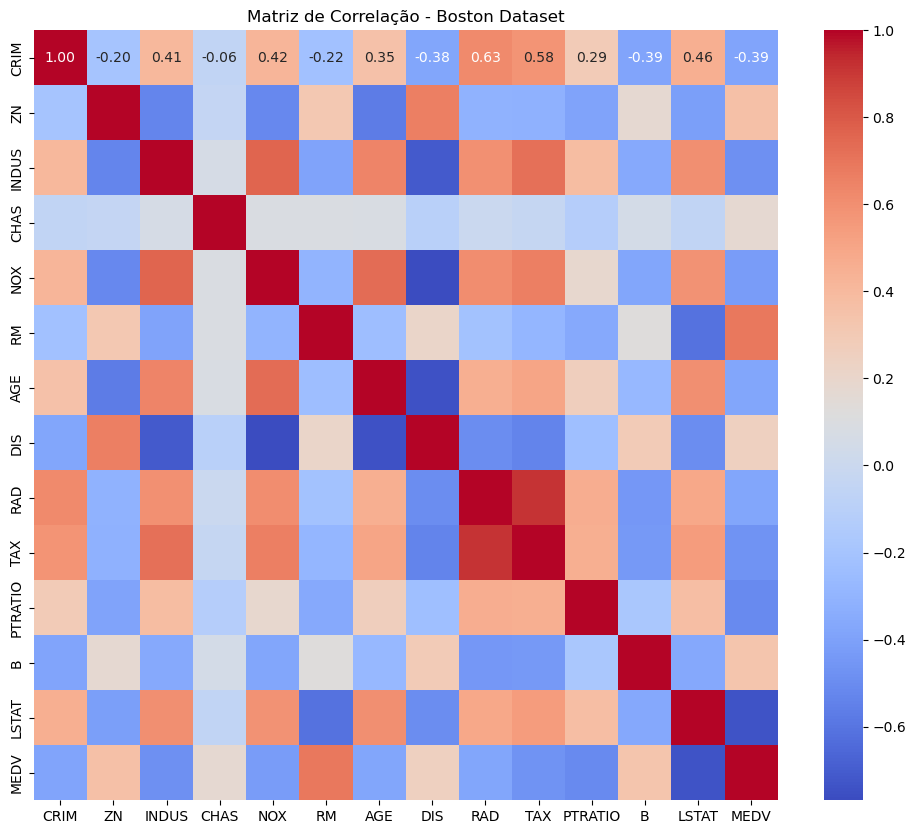

In [8]:
import matplotlib.pyplot as plt

corr_matriz = boston.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Boston Dataset')
plt.show()



Nosso foco principal é o MEDV (Valor mediano das casas ocupadas pelo proprietário em US1.000), enquanto as variáveis mais positivamente correlacionadas incluem RM (número médio de quartos por habitação), ZN (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados), e DIS (distâncias ponderadas até cinco centros de empregos de Boston), além de uma variável não considerada devido à Lei Geral de Proteção de Dados (LGPD). Também foram observadas correlações negativas fortes como LSTAT (%status inferior da população), PTRATIO (razão pupilo-professor da cidade), INDUS (proporção de acres de negócios não varejistas por cidade), TAX (taxa de imposto sobre a propriedade de valor total por US10.000), CRIM (taxa de crimes per capita da cidade) e outras variáveis. Correlações negativas indicam que maiores valores nessas variáveis estão associados a menores valores de MEDV (inversamente proporcionais), enquanto correlações positivas indicam o oposto (diretamente proporcionais). Dentre todas as variáveis citadas, as que tem mais potencial preditivo são o RM e o LSTAT, devido ao alto grau de correlação que elas apresentaram com MEDV.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [10]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [11]:
from sklearn.metrics import mean_squared_error
y_pred_reg_2 = regr_1.predict(X_train)
y_pred_reg_8 = regr_2.predict(X_train)

mse_reg_2 = mean_squared_error(y_train, y_pred_reg_2)
mse_reg_8 = mean_squared_error(y_train, y_pred_reg_8)
print(f'O MSE_treino para profundidade 2 foi: {mse_reg_2:.2f}.')
print(f'O MSE_treino para profundidade 8 foi: {mse_reg_8:.2f}.')

O MSE_treino para profundidade 2 foi: 25.85.
O MSE_treino para profundidade 8 foi: 1.80.


In [12]:
y_pred_regr_1_test = regr_1.predict(X_test)
y_pred_regr_2_test = regr_2.predict(X_test)

mse_regr_1_test = mean_squared_error(y_test, y_pred_regr_1_test)
mse_regr_2_test = mean_squared_error(y_test, y_pred_regr_2_test)

# Exibe os resultados
print(f'O MSE para a árvore com profundidade 2 nos dados de teste é: {mse_regr_1_test:.2f}.')
print(f'O MSE para a árvore com profundidade 8 nos dados de teste é: {mse_regr_2_test:.2f}.')

O MSE para a árvore com profundidade 2 nos dados de teste é: 26.46.
O MSE para a árvore com profundidade 8 nos dados de teste é: 17.50.


In [13]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R² da árvore de treino com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R² da árvore de treino com profundidade=2 é: 0,71
O R² da árvore de treino com profundidade=8 é: 0,98


In [14]:
mse1 = regr_1.score(X_test, y_test)
mse2 = regr_2.score(X_test, y_test)

template = "O R² da árvore de teste com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R² da árvore de teste com profundidade=2 é: 0,61
O R² da árvore de teste com profundidade=8 é: 0,74


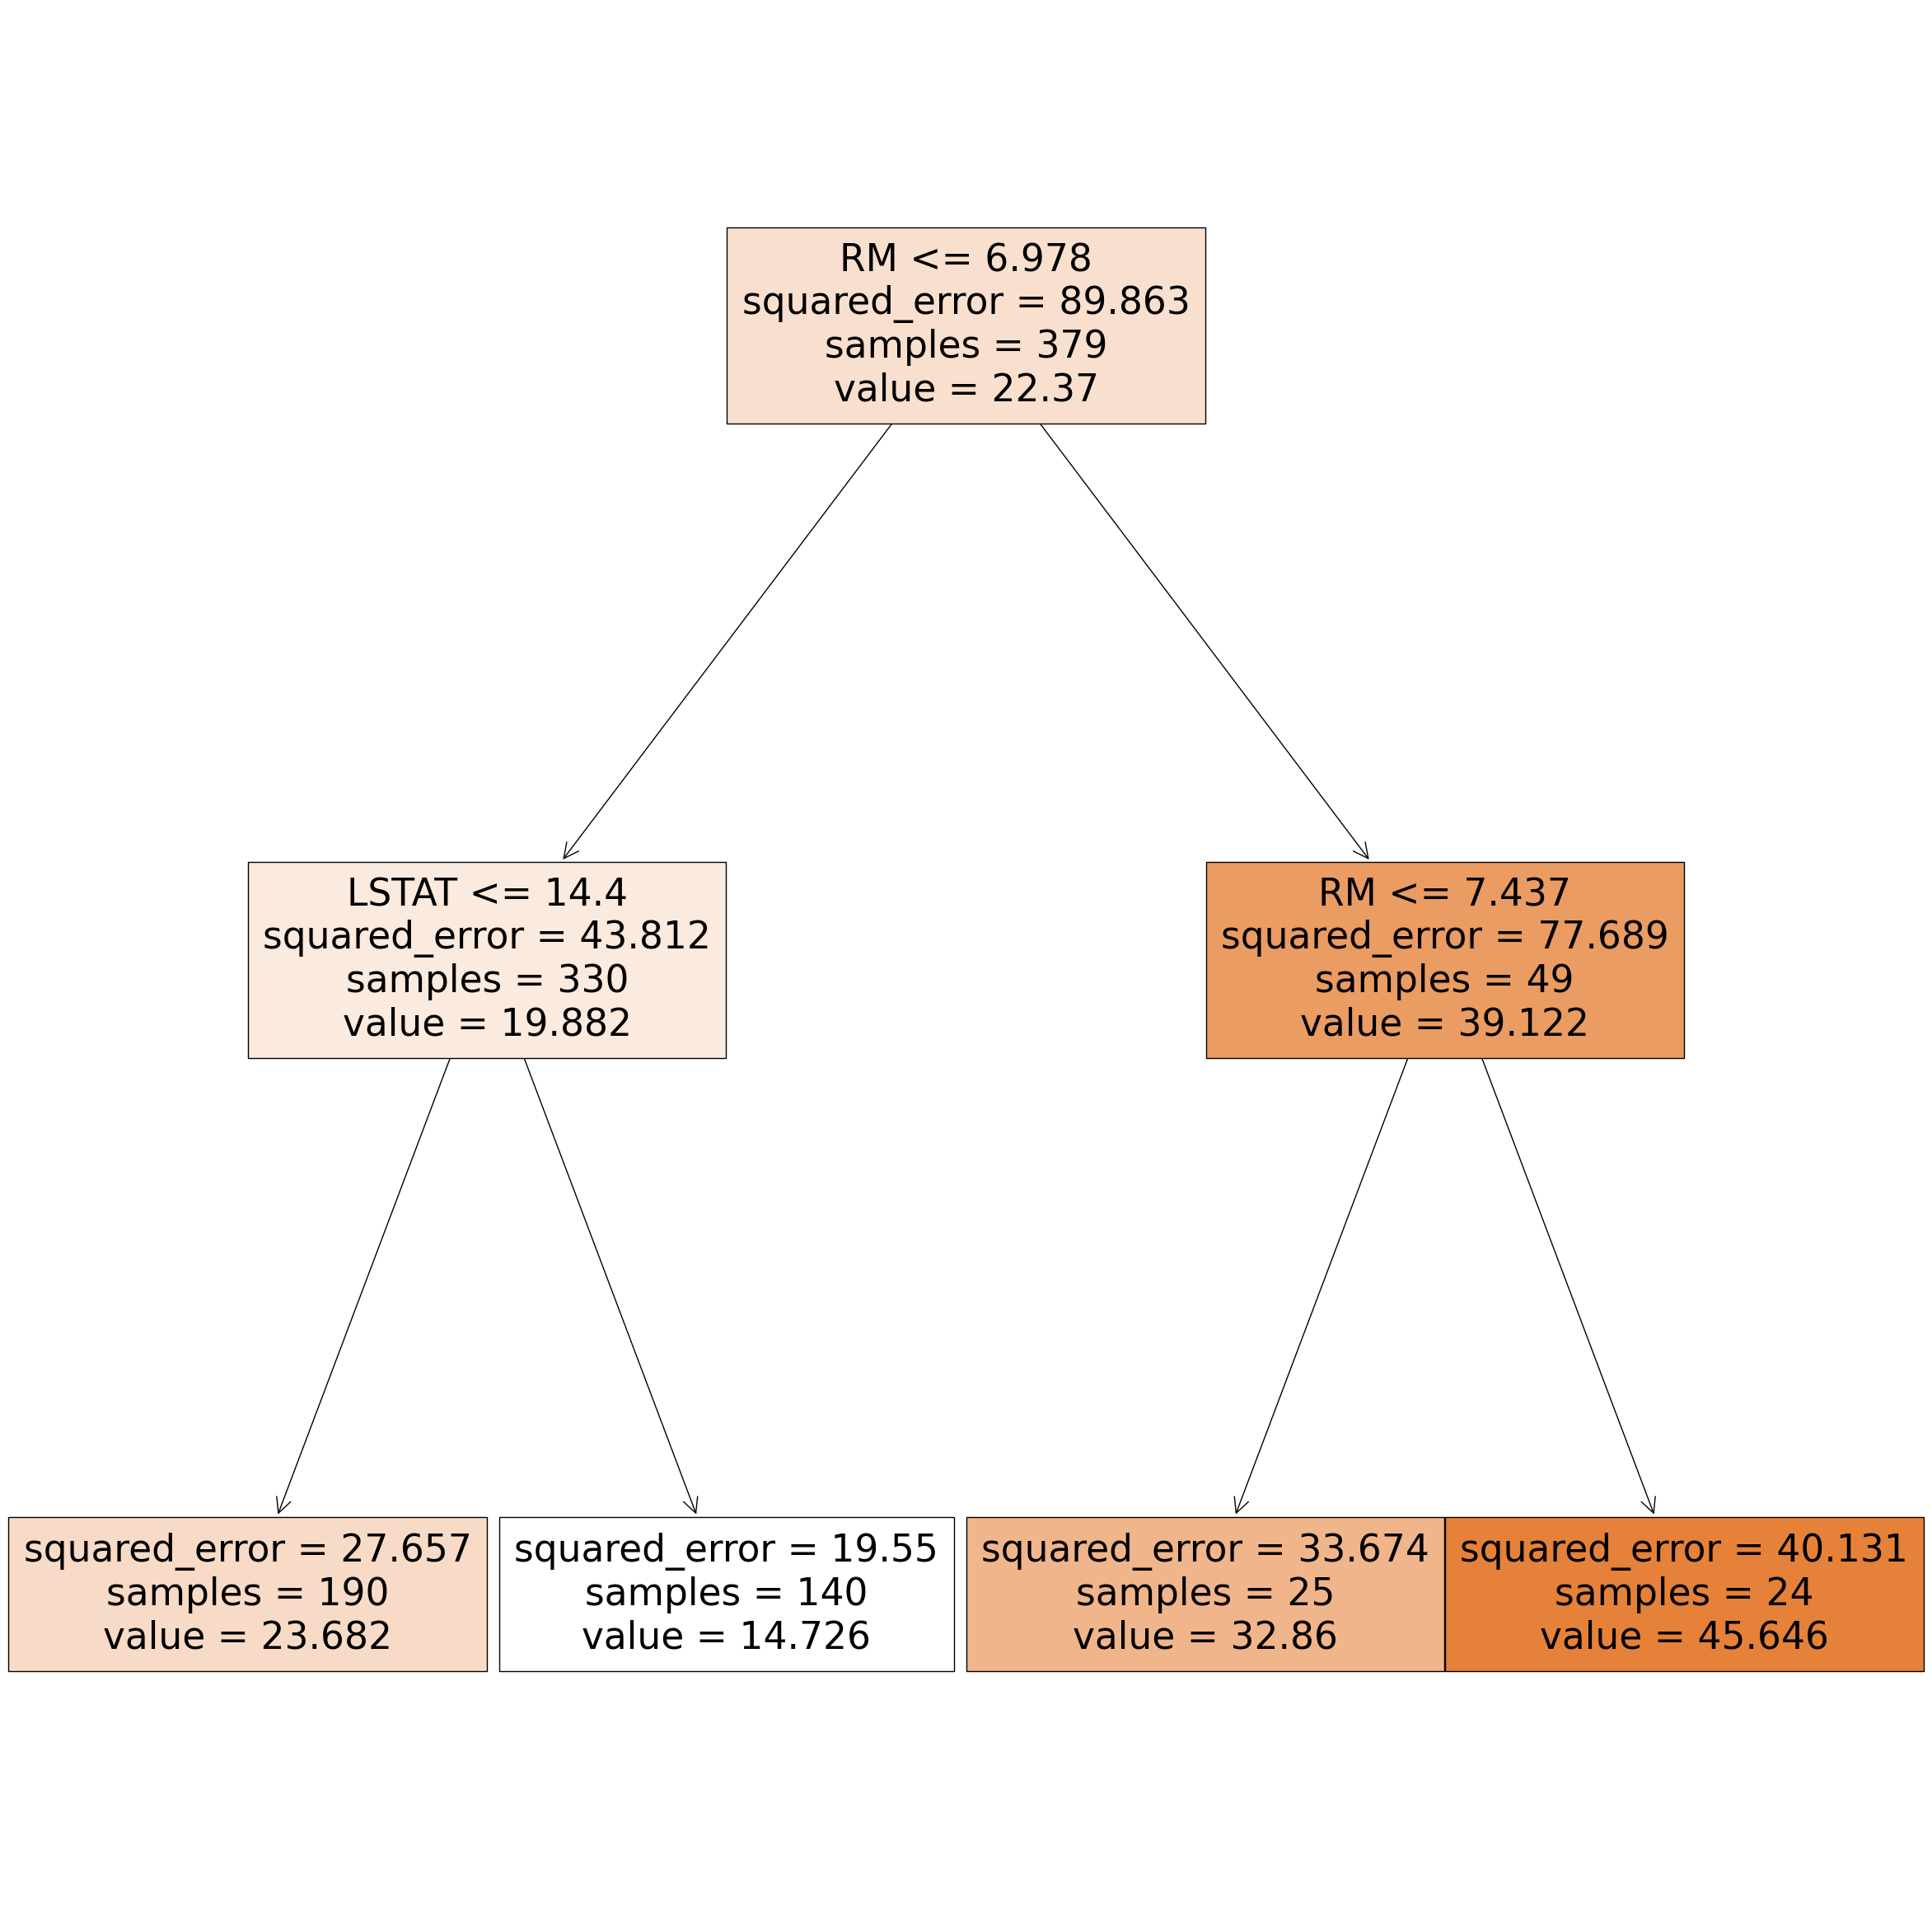

In [15]:
plt.rc('figure', figsize=(30, 30))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 

Os cálculos de MSE e R² para os conjuntos de teste e treinamento mostraram resultados discrepantes na árvore com profundidade 8, sugerindo que o modelo está superajustado (overfitting). Assim, embora a árvore de profundidade 8 tenha valores de MSE e R² superiores no teste, a árvore de profundidade 2 demonstra uma generalização mais eficaz do modelo, tornando-a mais adequada para esse cenário.


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [16]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.39972217e-15, 1.31926121e-05, 1.18733509e-04,
        2.11081794e-04, 3.29815303e-04, 3.29815303e-04, 3.29815303e-04,
        5.32102023e-04, 6.46437995e-04, 7.43183817e-04, 8.44327177e-04,
        8.61917326e-04, 1.31926121e-03, 1.31926121e-03, 1.59630607e-03,
        1.93931398e-03, 1.94283201e-03, 2.54177661e-03, 2.58575198e-03,
        2.58575198e-03, 2.96833773e-03, 3.37730871e-03, 3.44766931e-03,
        3.74010554e-03, 4.76253298e-03, 5.57387863e-03, 6.05892700e-03,
        6.35004398e-03, 7.14379947e-03, 7.39226033e-03, 7.44415128e-03,
        9.04636261e-03, 9.69656992e-03, 1.43667546e-02, 1.48636763e-02,
        1.59630607e-02, 1.61609499e-02, 1.74854881e-02, 1.80123131e-02,
        1.82438120e-02, 1.85795954e-02, 1.90501319e-02, 1.90501319e-02,
        2.11081794e-02, 2.11081794e-02, 2.17733069e-02, 2.20903694e-02,
        2.43500021e-02, 2.64127089e-02, 2.80512627e-02, 3.83189471e-02,
        4.02249026e-02, 4.84828496e-02, 5.56300046

Text(0, 0.5, 'Impureza total das folhas')

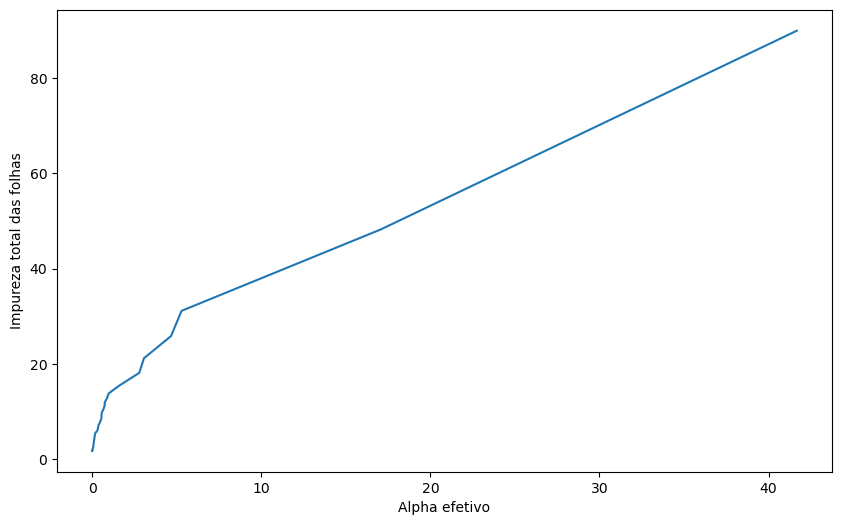

In [17]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [18]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

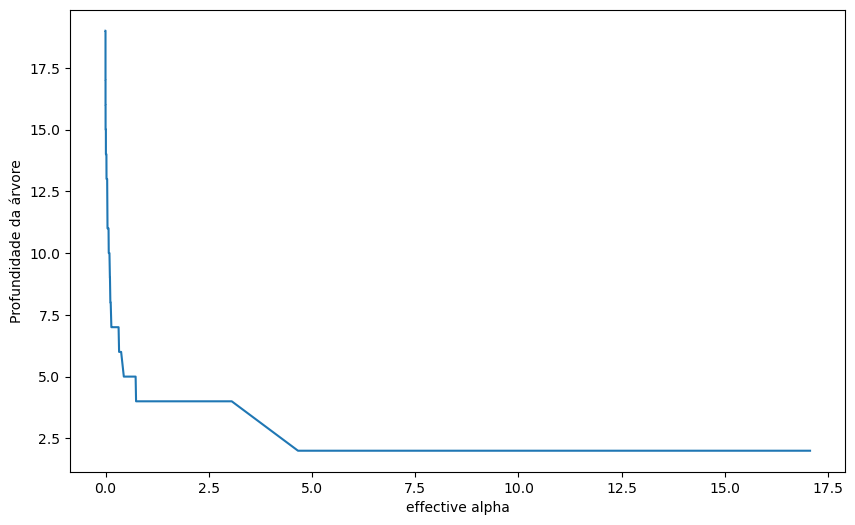

In [19]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [20]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
num_arvores = len(clfs)
print(f"Foram criadas {num_arvores} árvores com diferentes valores de alpha CCP.")

Foram criadas 101 árvores com diferentes valores de alpha CCP.


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [21]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

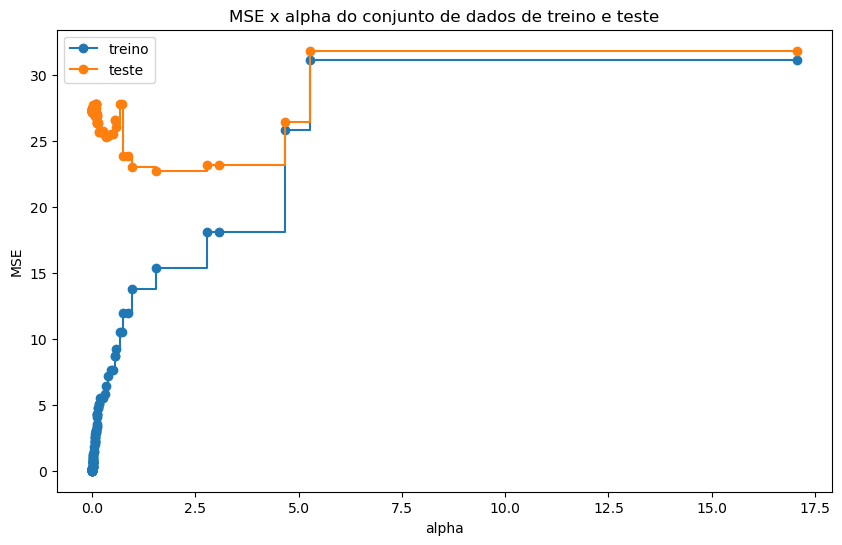

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Na base de testes, o MSE mínimo apresentado está para um alpha igual a 2.5

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

# Cria o modelo com alfa=2.5 e treina com os dados de treino
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=2.5)
arvore_final.fit(X_train, y_train)

# Calcula as previsões para o conjunto de testes
y_pred_final = arvore_final.predict(X_test)

# Calcula o R-quadrado
r2_final = r2_score(y_test, y_pred_final)
print(f"O coeficiente de determinação (R-quadrado) para alfa 2.5 é: {r2_final:.4f}")

# Obtém a profundidade da árvore
depth_final = arvore_final.tree_.max_depth
print(f"A profundidade da árvore é: {depth_final}")

# Calcula o MSE na base de testes
mse_final = mean_squared_error(y_test, y_pred_final)
print(f"O MSE na base de testes é: {mse_final:.4f}")



O coeficiente de determinação (R-quadrado) para alfa 2.5 é: 0.6655
A profundidade da árvore é: 4
O MSE na base de testes é: 22.6979


### 7. Visualize esta árvore.

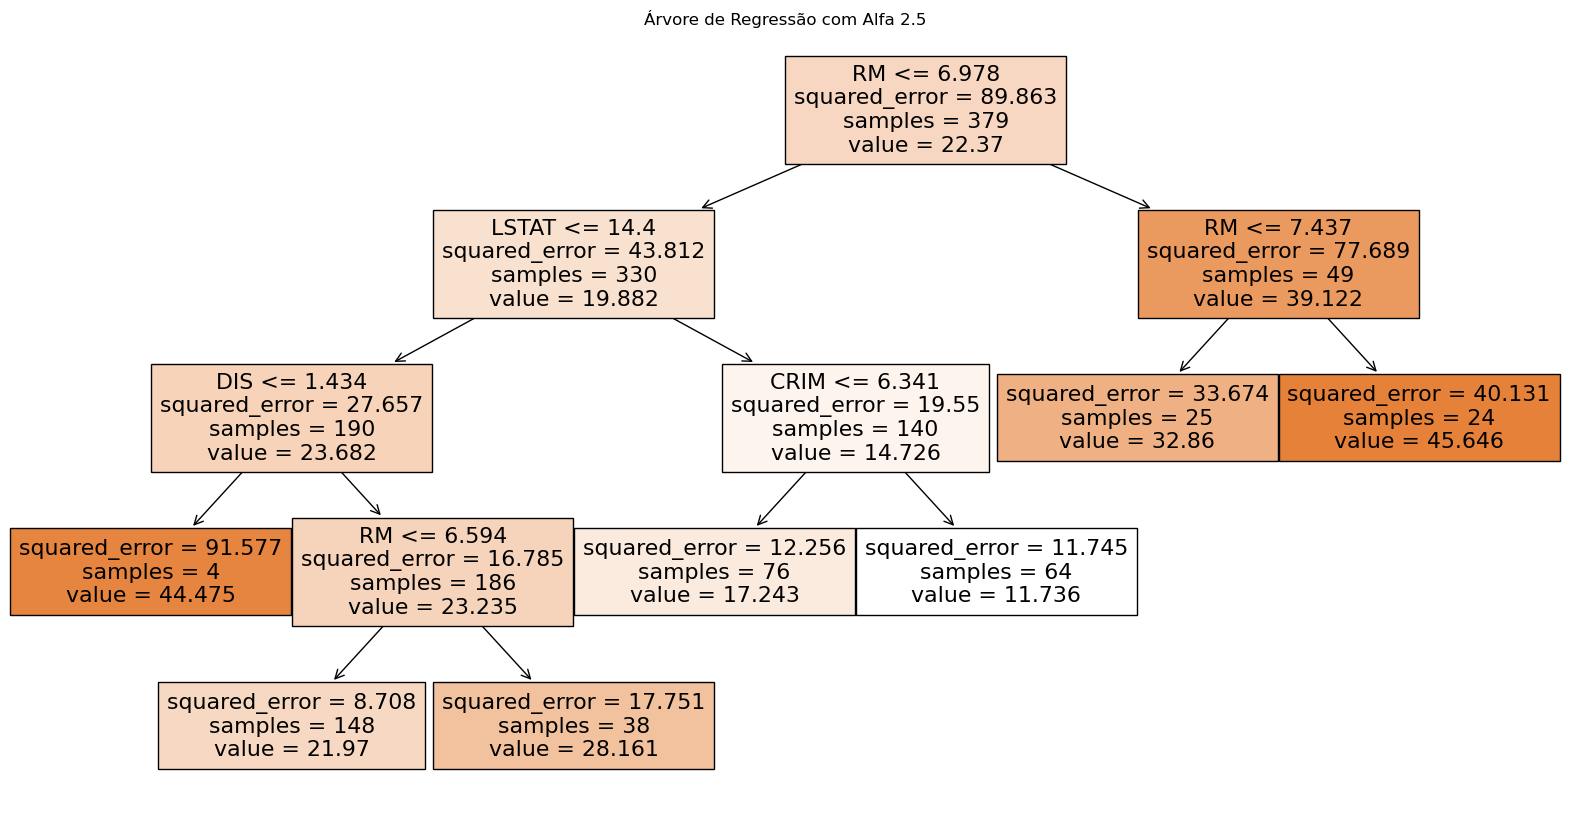

In [24]:
from sklearn.tree import plot_tree

# Visualiza a árvore de regressão com alfa 2.5
plt.figure(figsize=(20, 10))
plot_tree(arvore_final, feature_names=X_train.columns, filled=True)
plt.title('Árvore de Regressão com Alfa 2.5')
plt.show()
